# Life Expectancy Analysis

![Life Cyle](images/expectancy.jpg)

## 1. Business Understanding

### a) Introduction.

The objective of this project is to analyze life expectancy data using multiple regression modeling techniques. By employing multiple regression, we aim to identify and quantify the relationships that exist between various factors or predictors and life expectancy. This analysis will provide insights into the key drivers of life expectancy and help stakeholders make informed decisions related to public health, healthcare policies, and socioeconomic development.

### b) Problem Statement.

 This project seeks to address the importance of understanding the factors that significantly affect life expectancy. Traditional approaches to public health analysis often rely on limited analysis or anecdotal evidence, leading to incomplete insights. This knowledge gap hampers policymakers' ability to predict and interpret changes in life expectancy effectively. To address this problem, we propose utilizing multiple regression modeling techniques to comprehensively analyze life expectancy data. By conducting multiple regression, we can identify the relationships between different factors and life expectancy, taking into account the collective impact of multiple independent variable

### c) Main Objective

The main objective of this project is to analyze life expectancy data using multiple regression modeling techniques to identify and quantify the key factors influencing life expectancy. The analysis will help stakeholders make data-driven decisions in areas such as public health planning, resource allocation, and policy formulation.

### d) Subjective Objectives

1. Conduct exploratory data analysis to gain insights into the relationships between different variables and life expectancy, assisting in the selection of relevant variables for the regression model.

2. Develop a multiple regression model to predict life expectancy, considering the selected independent variables and their impact on the dependent variable.

3. Validate the model assumptions, assess its goodness of fit, and refine the model if necessary.

4. Interpret the coefficients of the independent variables in the model to determine their individual impact on life expectancy, identifying the most influential factors affecting life expectancy and their respective effects.

5. Evaluate and validate the performance of the model through appropriate metrics and statistical tests.

6. Provide actionable insights and recommendations based on the analysis to assist policymakers and public health officials in making informed decisions regarding healthcare strategies, resource allocation, and intervention planning.

### e) Notebook Structure

1. Reading the data.
2. Data Cleaning and Preprocessing.
3. Exploratory Data Analysis (EDA) and Feature Selection.
4. Multiple Regression Modeling.
5. Model Evaluation and Interpretation.
6. Results Presentation and Conclusions.
7. Recommendations.
8. References.

### f) Data Understanding

The dataset used in this project contains information about various factors affecting life expectancy, such as healthcare indicators, socioeconomic factors, and lifestyle variables. Explanatory data analysis will be used to gain a clear understanding of the dataset, including handling missing values, checking data types, identifying outliers, and selecting relevant features for analysis.

The source of the data used in this project is the World Health Organization (WHO). The dataset contains information compiled by the World Health Organization on various factors related to life expectancy and is used for analyzing the factors influencing life expectancy through multiple regression modeling techniques.

 **Country**: The name of the country for which the data is recorded.

 **Year**: The year for which the data is reported.

 **Developing Status**: Indicates whether the country is classified as "developing" or "developed."

 **Adult Mortality**: A measure of the probability of dying between the ages of 15 and 60 years per 1000 population.

 **Life Expectancy**: The average number of years a person is expected to live, based on current mortality rates.

 **Infant Deaths**: The number of infant deaths (children under one year old) in the country in a given year.

 **Alcohol Consumption per Capita**: The average amount of alcohol consumed per person in the country.

 **Country's Expenditure on Health**: The amount of money spent on healthcare by the country.

 **Immunization Coverage**: The percentage of the population covered by immunization programs.

 **BMI (Body Mass Index)**: A measure of body fat based on height and weight.

 **Deaths Under 5-years-old**: The number of deaths of children under five years old in the country in a given year.

 **Deaths due to HIV/AIDS**: The number of deaths attributed to HIV/AIDS in the country in a given year.

 **GDP (Gross Domestic Product)**: The total economic output of the country.

 **Population**: The total population of the country in a given year.

 **Body Condition**: Possibly a measure of overall health or well-being.

 **Income Information**: Information about the average income or income distribution in the country.
 
 **Education**: Possibly information about educational attainment or literacy rates in the country.


## 2. Import Relevant Packages

In [2]:
import numpy as np # For mathematical functions and operations
import pandas as pd # For data manipulation and analysis

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt # For data Visualisation
%matplotlib inline 
# For showing the visuals on the current notebook
import seaborn as sns # For enhanced data visualisation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report


## 3. Reading the Data

In [3]:
# Load dataset in form a dataframe
data = pd.read_csv('Life Expectancy Data.csv')
# Print the first five rows of our data
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 4. Explanatory Data Analysis & Featue Selection

In [6]:
# Display the column names
# Create a new DataFrame with column names as a single column
column_names_data = pd.DataFrame({'Column Names': data.columns})
print("\nColumn names:")
print(column_names_data)


Column names:
                       Column Names
0                           Country
1                              Year
2                            Status
3                  Life expectancy 
4                   Adult Mortality
5                     infant deaths
6                           Alcohol
7            percentage expenditure
8                       Hepatitis B
9                          Measles 
10                             BMI 
11               under-five deaths 
12                            Polio
13                Total expenditure
14                      Diphtheria 
15                         HIV/AIDS
16                              GDP
17                       Population
18             thinness  1-19 years
19               thinness 5-9 years
20  Income composition of resources
21                        Schooling


In [7]:
# Display the data types of each column
print("\nData types:")
print(data.dtypes)


Data types:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object



Data types specify the format in which values are stored for each column in the dataset, such as objects for text and integers for whole numbers.
Understanding data types helps in selecting appropriate operations and analyses, ensuring data integrity, and optimizing memory usage.
Proper handling of data types is crucial for effective data manipulation and accurate insights during data exploration and modeling.

In [10]:
# Display summary statistics (mean, median, standard deviation, etc.) for numeric columns
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


The summary statistics provide a concise overview of the dataset's numeric variables, including mean, median, standard deviation, and quartile values.
They offer insights into the central tendency and variability of the data, assisting in understanding the distribution of each numerical feature.
This brief summary aids in detecting potential outliers, assessing data quality, and forming initial hypotheses for further analysis

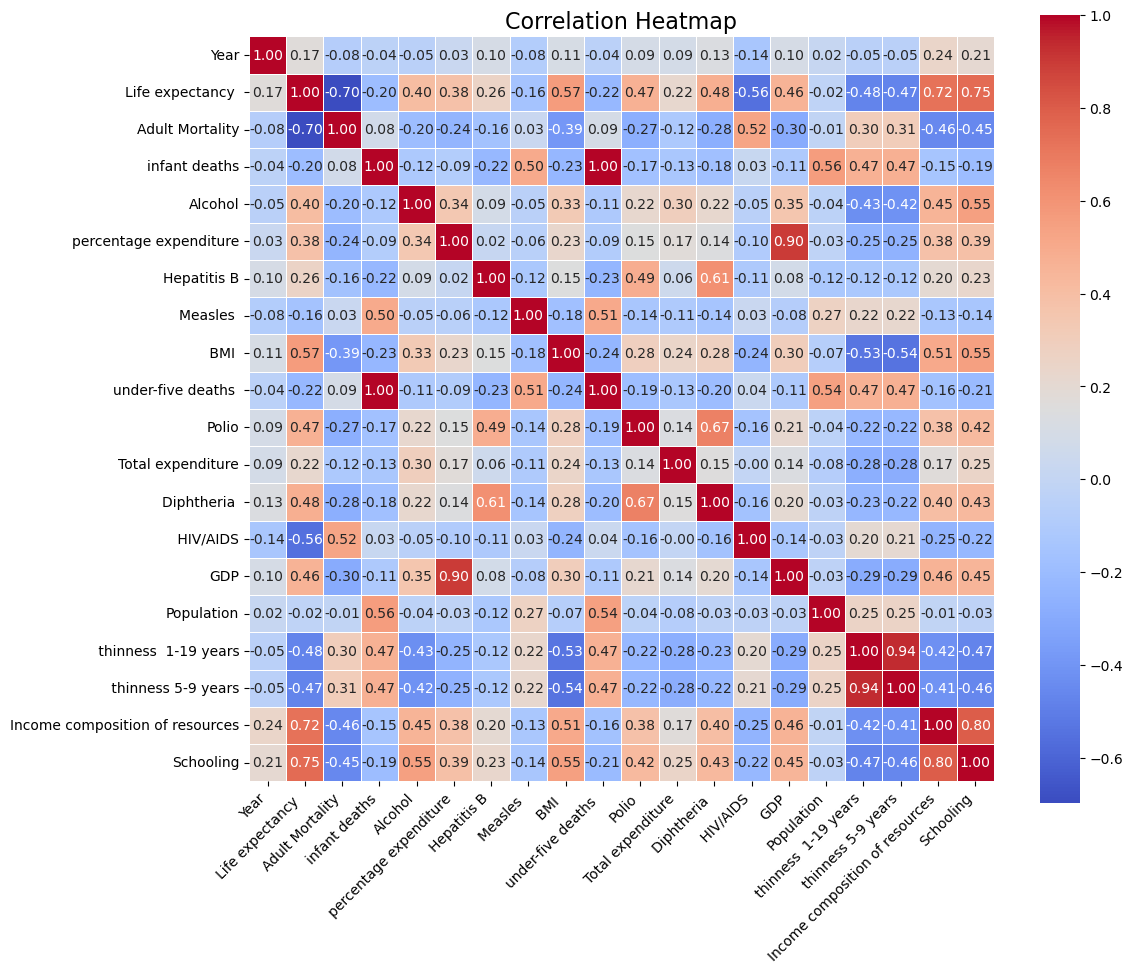

In [14]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create a captivating heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)

# Add a title to the plot
plt.title('Correlation Heatmap', fontsize=16)

# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


The heatmap illustrates the correlation between different variables, using cool and warm colors to indicate positive and negative relationships, respectively.
The diagonal line suggests strong positive correlation between variables with similar shades, while the off-diagonal areas represent weaker or negative correlations.
This captivating visualization helps identify potential patterns and dependencies among features in the dataset, aiding data exploration and analysis.

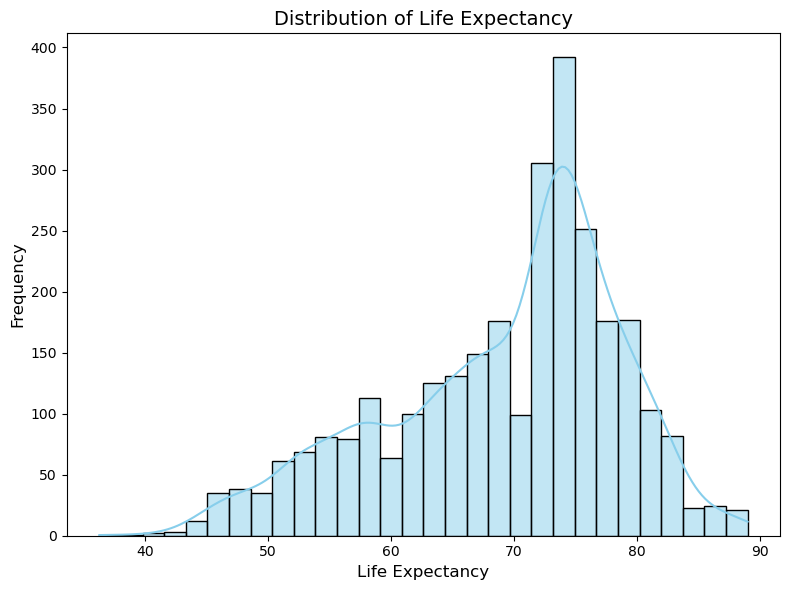

In [20]:
# Distribution of the target variable
# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a distribution plot (histogram) for the 'Life Expectancy' column
sns.histplot(data['Life expectancy '], kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Life Expectancy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Life Expectancy', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

The tail of the distribution extends towards the left, indicating a higher frequency of lower values and fewer higher values.
The mean is typically less than the median, pulling the central tendency towards the lower end of the data range.
A left-skewed distribution is also known as negatively skewed, and its peak occurs on the right side of the distribution.

## 5. Data Wrangling

### a) Data Cleaning

In [21]:
# Check for null values
pd.DataFrame(data.isna().sum()).T

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,0,0,10,10,0,194,0,553,0,...,19,226,19,0,448,652,34,34,167,163


In [24]:
# Replace missing numeric values with the mean of the column
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [26]:
# Replace missing categorical values with the most frequent value
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [27]:
# Verify that there are no missing values left
print("\nAfter handling missing values:")
print(data.isna().sum())


After handling missing values:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


 ***We have dealt with all the Missing Values!***

### b) Handling Duplicates

In [29]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Remove duplicate rows
data = data[~duplicate_rows]

### c) Converting Datatypes

In [31]:
# Convert 'Year' to categorical data type
data['Year'] = data['Year'].astype('category')

# Convert 'Status' to categorical data type
data['Status'] = data['Status'].astype('category')

Converting the columns to categorical data type help enhance data representation, reduce memory usage, and prevent unintended errors or operations when dealing with specific types of data. 

In [32]:
# Remove leading/trailing whitespaces from 'Country' column
data['Country'] = data['Country'].str.strip()

### d) Encoding Categorical Data

In [36]:
# Example: One-hot encoding 'Status' column
data = pd.get_dummies(data, columns=['Status'], drop_first=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   object  
 1   Year                             2938 non-null   category
 2   Life expectancy                  2938 non-null   float64 
 3   Adult Mortality                  2938 non-null   float64 
 4   infant deaths                    2938 non-null   int64   
 5   Alcohol                          2938 non-null   float64 
 6   percentage expenditure           2938 non-null   float64 
 7   Hepatitis B                      2938 non-null   float64 
 8   Measles                          2938 non-null   int64   
 9    BMI                             2938 non-null   float64 
 10  under-five deaths                2938 non-null   int64   
 11  Polio                            2938 non-null   float64 
 12  Total 

### e) Univariate Analysis

Summary statistics for Life expectancy 
count    2938.000000
mean       69.224932
std         9.507640
min        36.300000
25%        63.200000
50%        72.000000
75%        75.600000
max        89.000000
Name: Life expectancy , dtype: float64


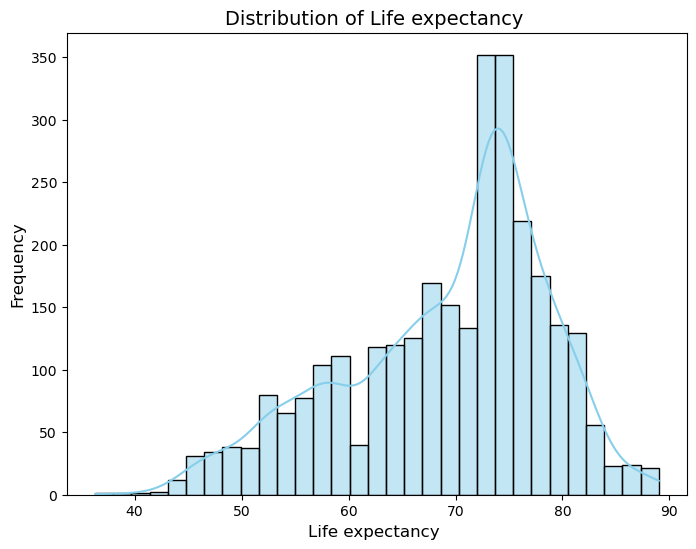

Summary statistics for Adult Mortality
count    2938.000000
mean      164.796448
std       124.080302
min         1.000000
25%        74.000000
50%       144.000000
75%       227.000000
max       723.000000
Name: Adult Mortality, dtype: float64


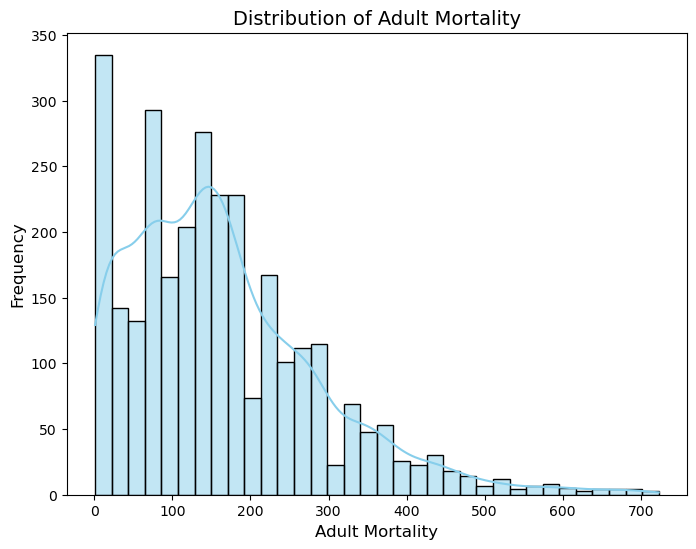

Summary statistics for infant deaths
count    2938.000000
mean       30.303948
std       117.926501
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max      1800.000000
Name: infant deaths, dtype: float64


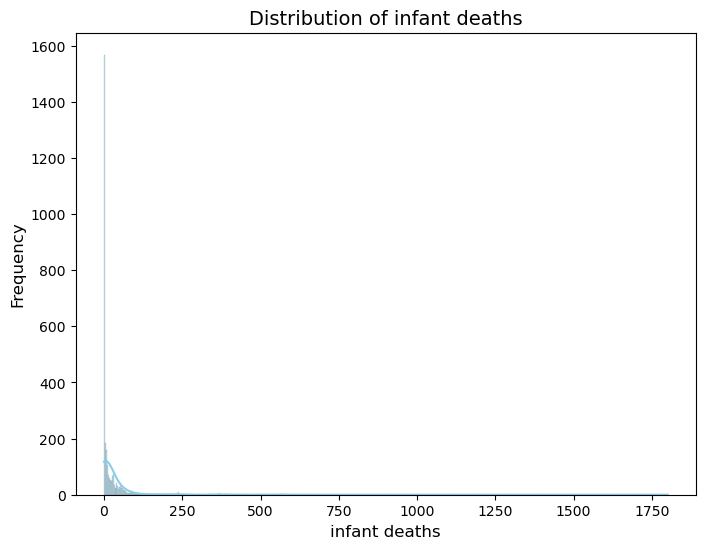

Summary statistics for Alcohol
count    2938.000000
mean        4.602861
std         3.916288
min         0.010000
25%         1.092500
50%         4.160000
75%         7.390000
max        17.870000
Name: Alcohol, dtype: float64


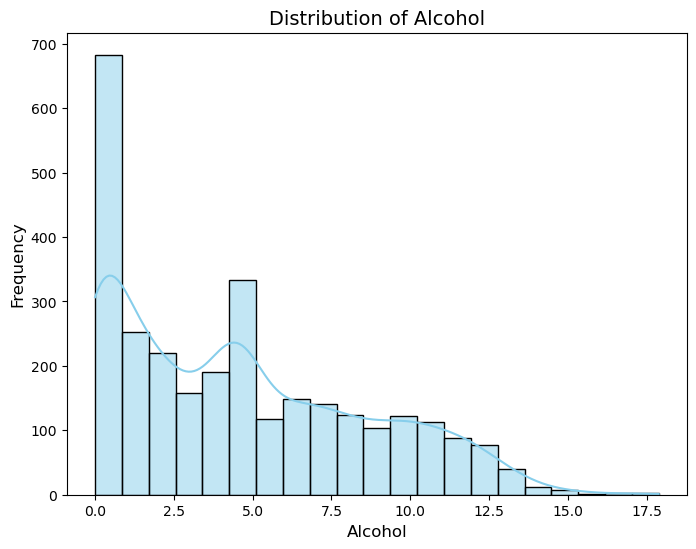

Summary statistics for percentage expenditure
count     2938.000000
mean       738.251295
std       1987.914858
min          0.000000
25%          4.685343
50%         64.912906
75%        441.534144
max      19479.911610
Name: percentage expenditure, dtype: float64


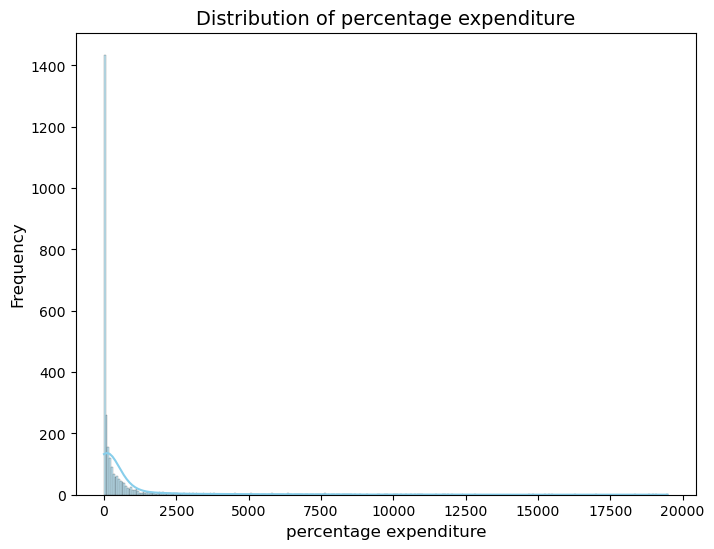

Summary statistics for Hepatitis B
count    2938.000000
mean       80.940461
std        22.586855
min         1.000000
25%        80.940461
50%        87.000000
75%        96.000000
max        99.000000
Name: Hepatitis B, dtype: float64


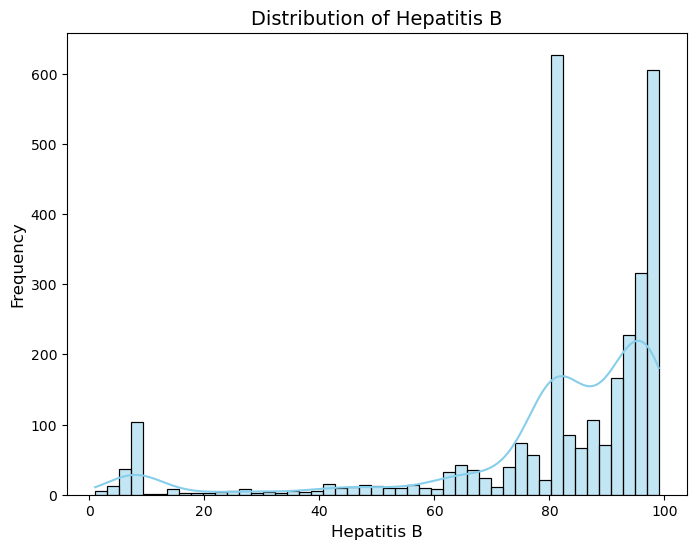

Summary statistics for Measles 
count      2938.000000
mean       2419.592240
std       11467.272489
min           0.000000
25%           0.000000
50%          17.000000
75%         360.250000
max      212183.000000
Name: Measles , dtype: float64


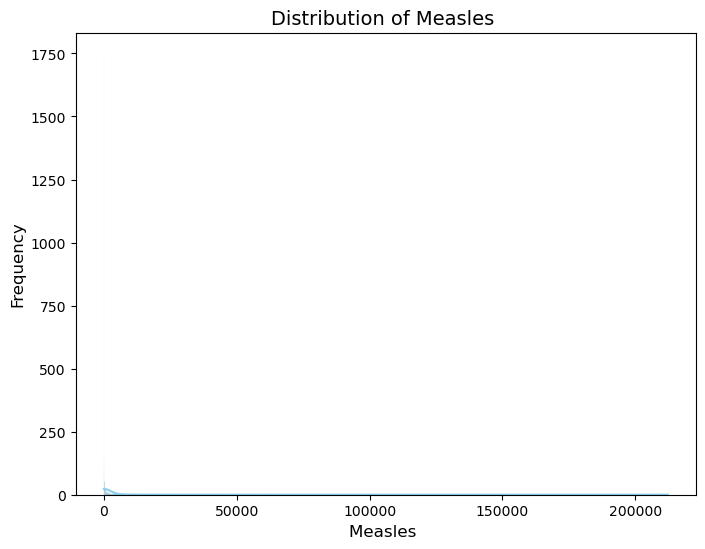

Summary statistics for  BMI 
count    2938.000000
mean       38.321247
std        19.927677
min         1.000000
25%        19.400000
50%        43.000000
75%        56.100000
max        87.300000
Name:  BMI , dtype: float64


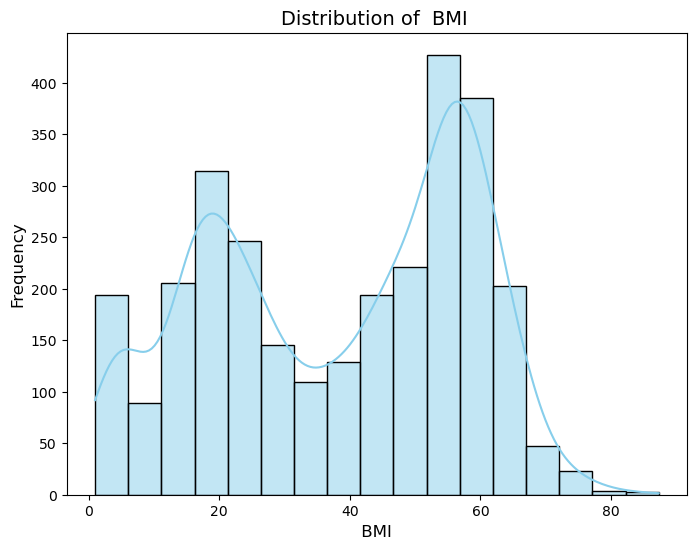

Summary statistics for under-five deaths 
count    2938.000000
mean       42.035739
std       160.445548
min         0.000000
25%         0.000000
50%         4.000000
75%        28.000000
max      2500.000000
Name: under-five deaths , dtype: float64


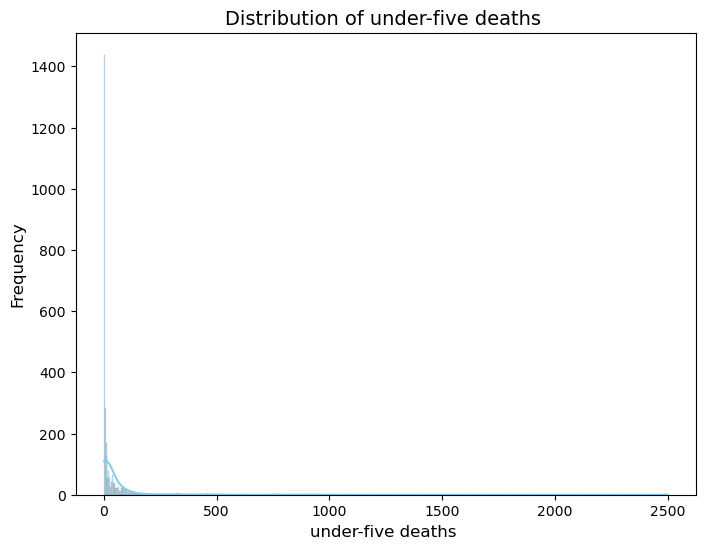

Summary statistics for Polio
count    2938.000000
mean       82.550188
std        23.352143
min         3.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64


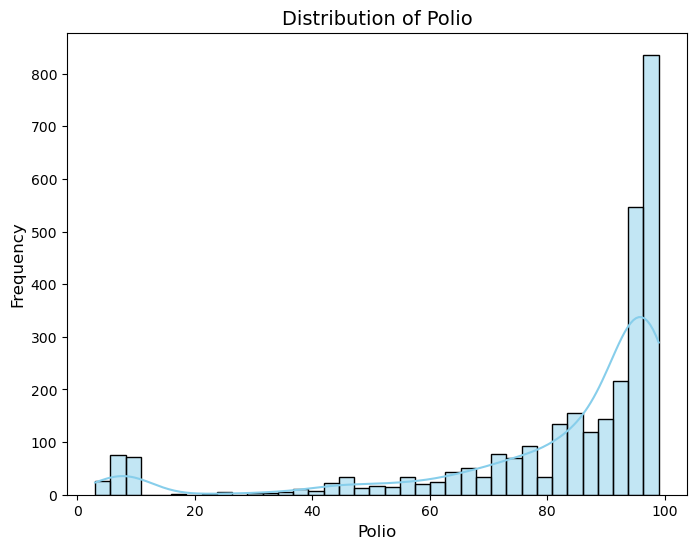

Summary statistics for Total expenditure
count    2938.000000
mean        5.938190
std         2.400274
min         0.370000
25%         4.370000
50%         5.938190
75%         7.330000
max        17.600000
Name: Total expenditure, dtype: float64


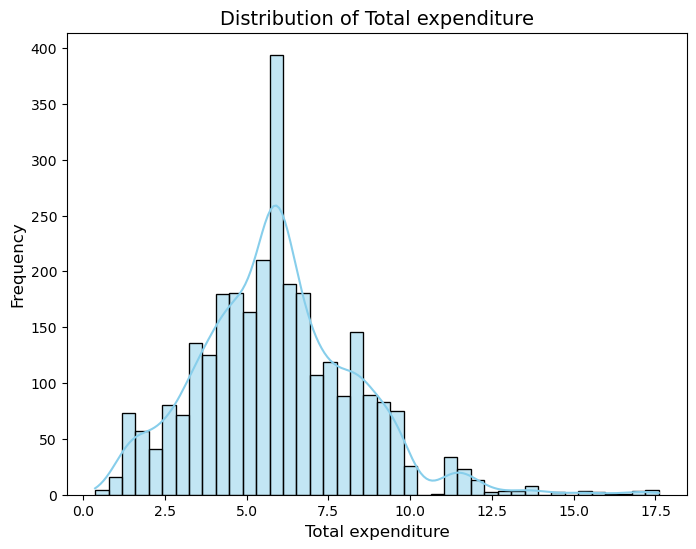

Summary statistics for Diphtheria 
count    2938.000000
mean       82.324084
std        23.640073
min         2.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Diphtheria , dtype: float64


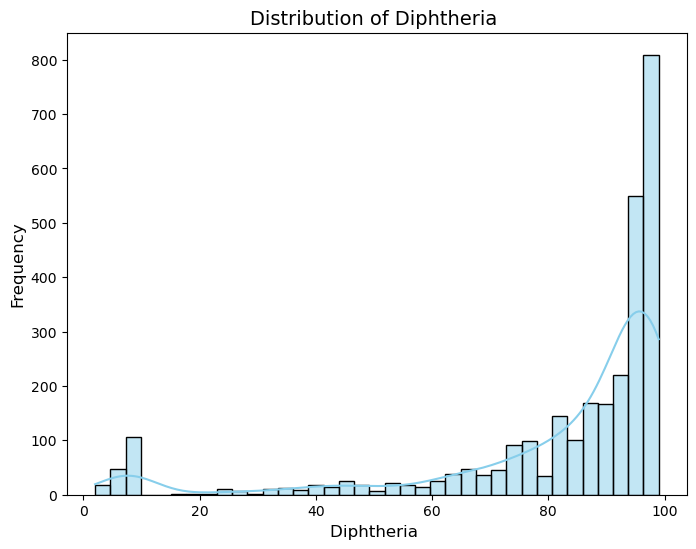

Summary statistics for  HIV/AIDS
count    2938.000000
mean        1.742103
std         5.077785
min         0.100000
25%         0.100000
50%         0.100000
75%         0.800000
max        50.600000
Name:  HIV/AIDS, dtype: float64


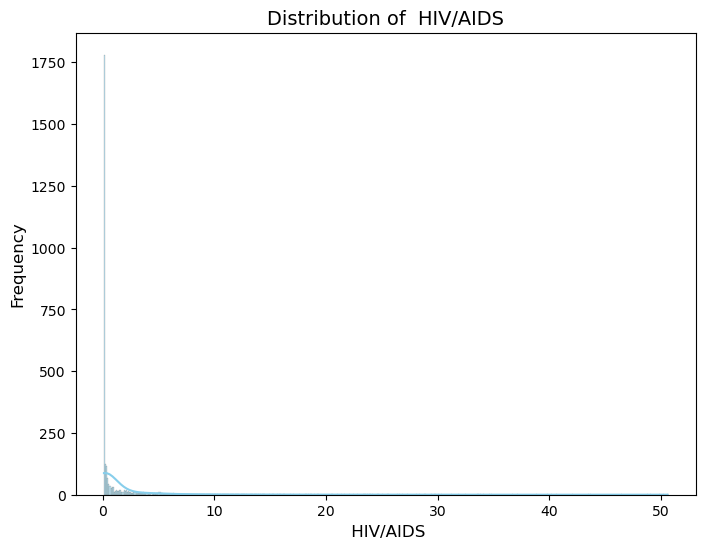

Summary statistics for GDP
count      2938.000000
mean       7483.158469
std       13136.800417
min           1.681350
25%         580.486996
50%        3116.561755
75%        7483.158469
max      119172.741800
Name: GDP, dtype: float64


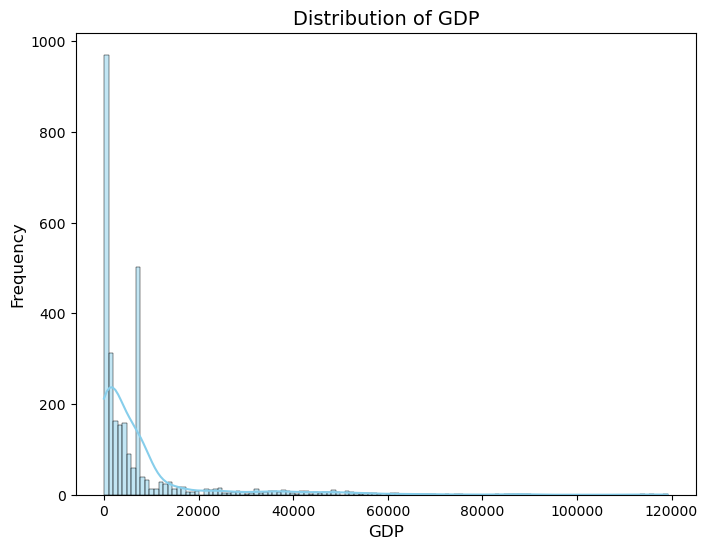

Summary statistics for Population
count    2.938000e+03
mean     1.275338e+07
std      5.381546e+07
min      3.400000e+01
25%      4.189172e+05
50%      3.675929e+06
75%      1.275338e+07
max      1.293859e+09
Name: Population, dtype: float64


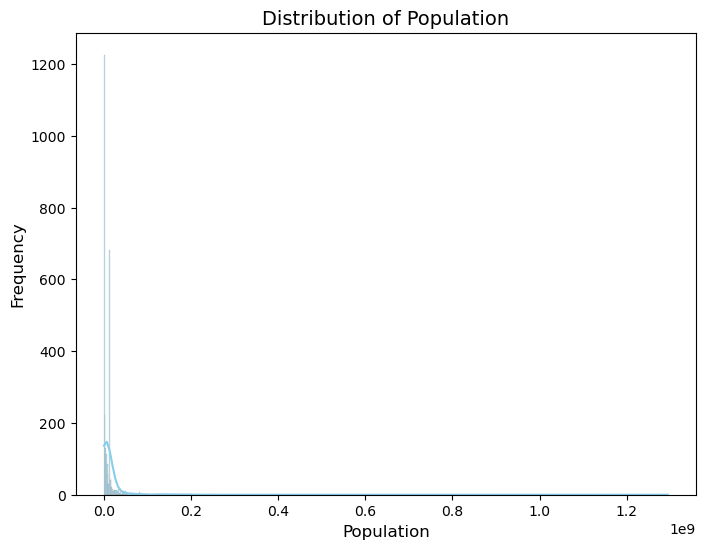

Summary statistics for  thinness  1-19 years
count    2938.000000
mean        4.839704
std         4.394535
min         0.100000
25%         1.600000
50%         3.400000
75%         7.100000
max        27.700000
Name:  thinness  1-19 years, dtype: float64


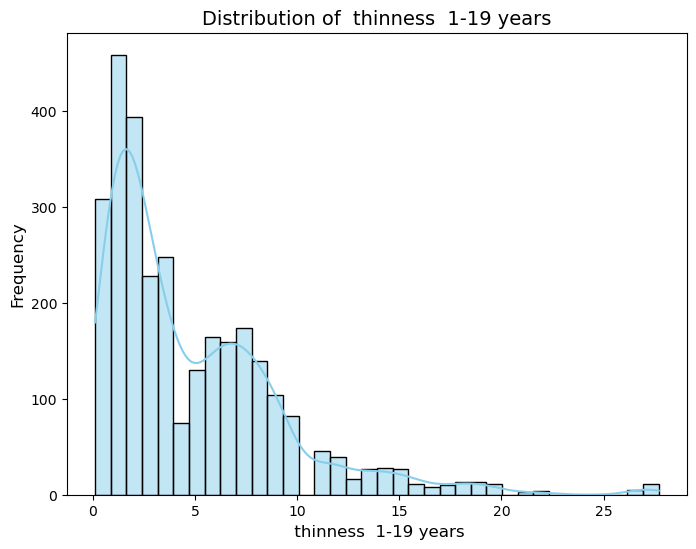

Summary statistics for  thinness 5-9 years
count    2938.000000
mean        4.870317
std         4.482708
min         0.100000
25%         1.600000
50%         3.400000
75%         7.200000
max        28.600000
Name:  thinness 5-9 years, dtype: float64


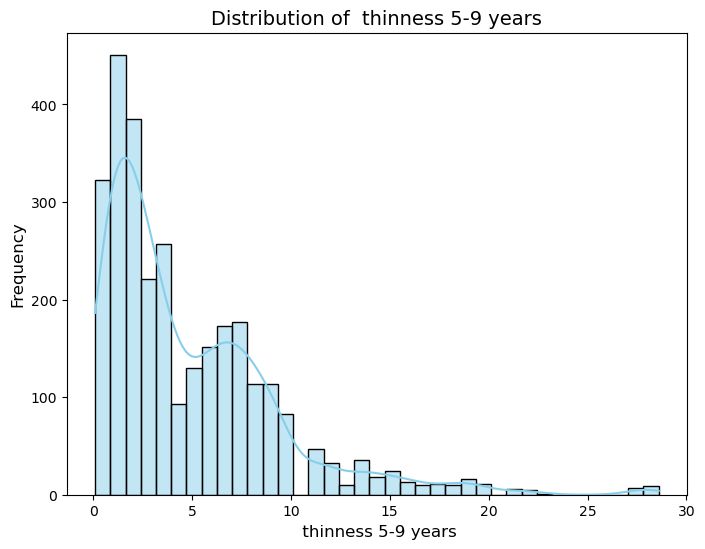

Summary statistics for Income composition of resources
count    2938.000000
mean        0.627551
std         0.204820
min         0.000000
25%         0.504250
50%         0.662000
75%         0.772000
max         0.948000
Name: Income composition of resources, dtype: float64


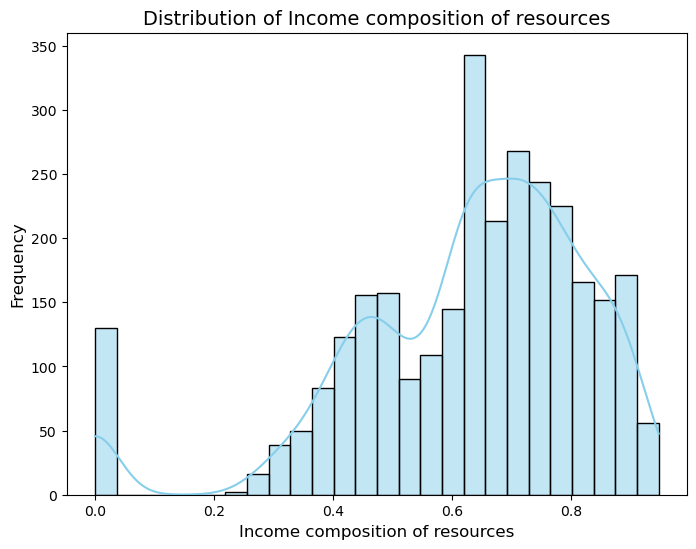

Summary statistics for Schooling
count    2938.000000
mean       11.992793
std         3.264381
min         0.000000
25%        10.300000
50%        12.100000
75%        14.100000
max        20.700000
Name: Schooling, dtype: float64


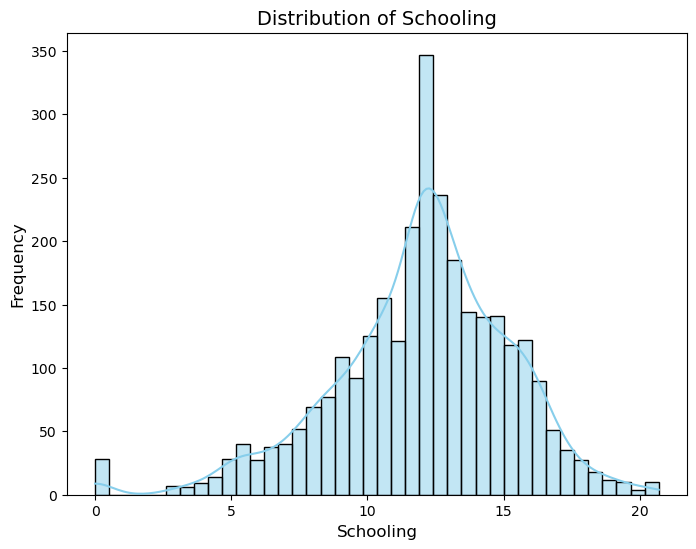

Frequency counts for Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64


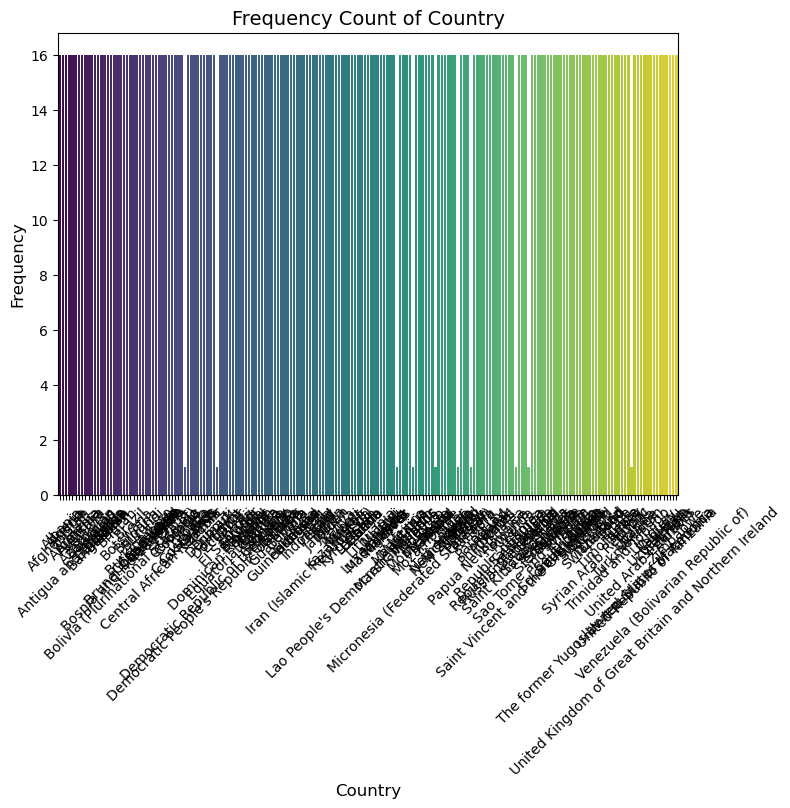

Frequency counts for Year
2013    193
2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2014    183
2015    183
Name: Year, dtype: int64


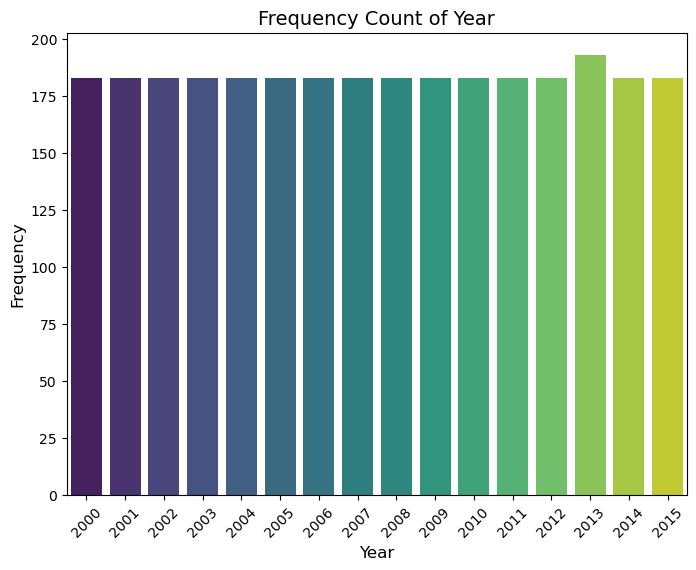

In [39]:
# Separate numeric and categorical variables
numeric_vars = data.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = data.select_dtypes(include=['object', 'category']).columns

# Univariate analysis for numeric variables
for var in numeric_vars:
    # Summary statistics
    print("Summary statistics for", var)
    print(data[var].describe())
    
    # Distribution plot (histogram)
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var], kde=True, color='skyblue')
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of ' + var, fontsize=14)
    plt.show()

# Univariate analysis for categorical variables
for var in categorical_vars:
    # Frequency counts
    print("Frequency counts for", var)
    print(data[var].value_counts())
    
    # Bar plot
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=data, palette='viridis')
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Frequency Count of ' + var, fontsize=14)
    plt.xticks(rotation=45)
    plt.show()



We have analyzed each variable individually. For numeric variables, we have explored their distribution using histograms and summary statistics. For categorical variables,we examined the frequency counts.

### f) Bivariate Analysis

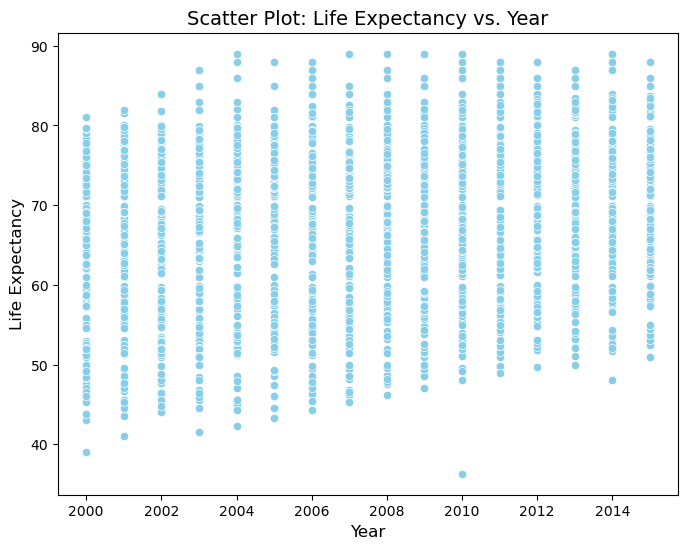

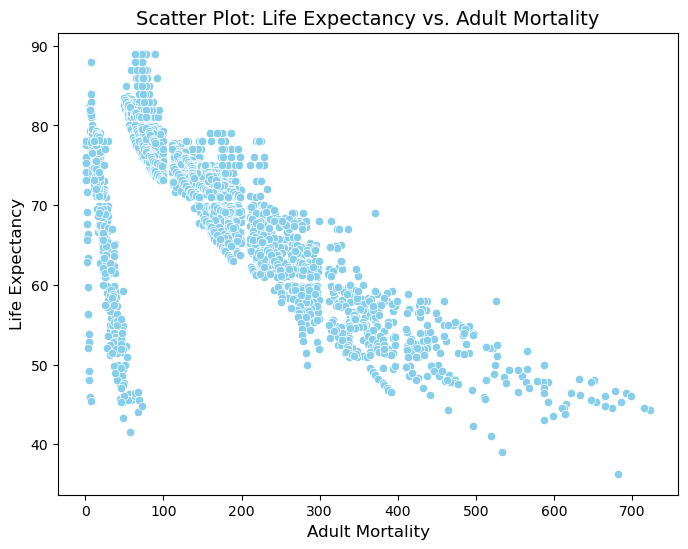

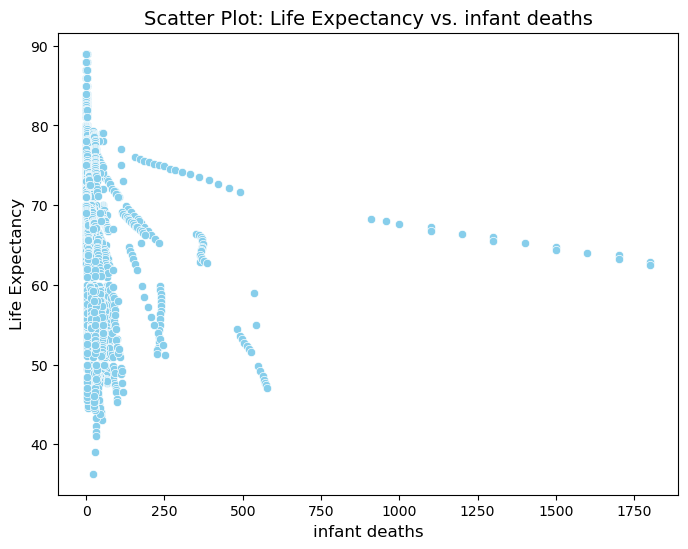

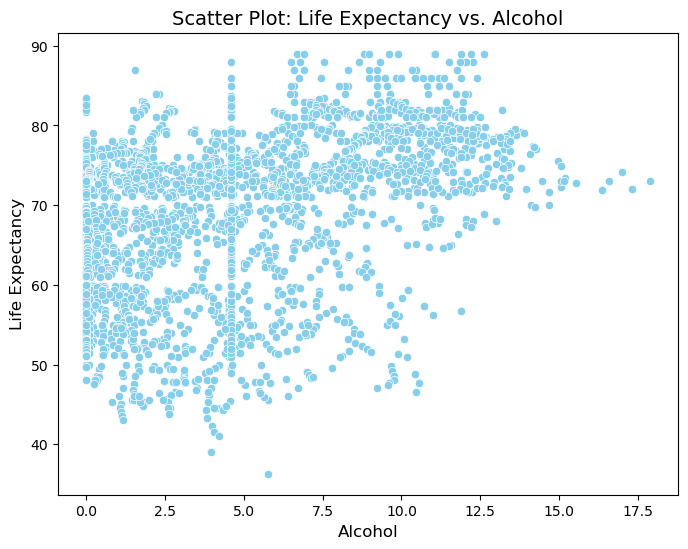

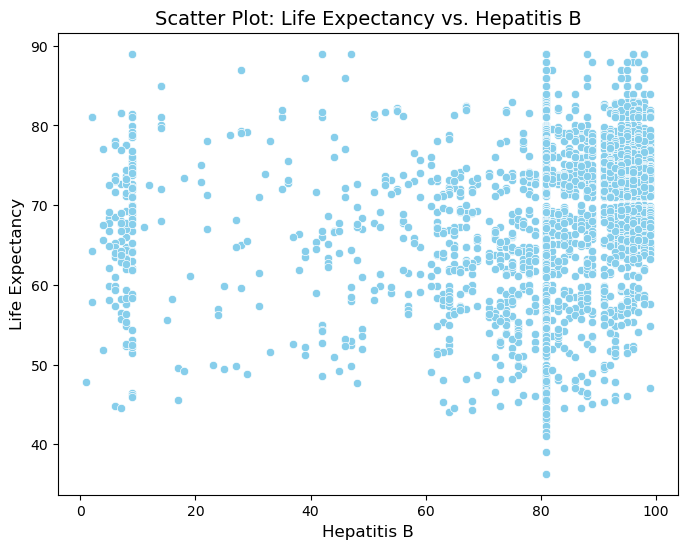

In [52]:
# Selecting 10 other columns for bivariate analysis
other_columns = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B']

# Loop through the selected columns and create bivariate visualizations
for column in other_columns:
    plt.figure(figsize=(8, 6))
    
    if data[column].dtype == 'object' or data[column].nunique() <= 10:
        # Bar plot for categorical variables with fewer unique values
        sns.barplot(x=column, y='Life expectancy ', data=data, palette='viridis')
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Life Expectancy', fontsize=12)
        plt.title(f'Bar Plot: Life Expectancy vs. {column}', fontsize=14)
        plt.xticks(rotation=45)
    else:
        # Scatter plot for numeric variables
        sns.scatterplot(x=column, y='Life expectancy ', data=data, color='skyblue')
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Life Expectancy', fontsize=12)
        plt.title(f'Scatter Plot: Life Expectancy vs. {column}', fontsize=14)

    plt.show()